In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Credit_Scoring/Test/Tổng hợp quan trong/Dữ liệu/Dữ liệu sau xử lý/data_filled.csv')

In [3]:
df.head()

,Unnamed: 0,LoanBriefID,LoanAmount,LoanTime,IsReMarketing,ProvinceId,Gender,Age,JobId,ImcomeType,IsMerried,NumberBaby,RelationshipType,LivingWith,RateTypeId,ProductId,ResidentType,LoanAmountExpertiseAI,NumberCall,score,label_result
0,0,1095199,30000000,12,0,1,0.0,31,123.0,1.0,1.0,1.0,1.0,1.0,10,5,6,48800000.0,0.0,1.0,True
1,1,950035,12000000,6,1,1,0.0,30,123.0,5.0,1.0,2.0,1.0,3.0,10,2,4,13600000.0,1.0,0.6,False
2,2,975972,10000000,9,1,1,0.0,29,123.0,1.0,1.0,1.0,1.0,2.0,10,5,4,24000000.0,1.0,0.9,True
3,3,943144,5000000,9,1,79,0.0,25,123.0,5.0,0.0,0.0,2.0,1.0,10,2,4,0.0,8.0,0.9,True
4,4,1015972,16000000,9,0,1,0.0,28,123.0,1.0,0.0,1.0,15.0,0.0,10,2,7,24100000.0,0.0,0.4,False


In [4]:
df.columns

Index(['Unnamed: 0', 'LoanBriefID', 'LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall',
       'score', 'label_result'],
      dtype='object')

In [5]:
features = ['LoanBriefID', 'LoanAmount', 'LoanTime', 'IsReMarketing',
       'ProvinceId', 'Gender', 'Age', 'JobId', 'ImcomeType', 'IsMerried',
       'NumberBaby', 'RelationshipType', 'LivingWith', 'RateTypeId',
       'ProductId', 'ResidentType', 'LoanAmountExpertiseAI', 'NumberCall']

In [6]:
X = df[features]
y = df["label_result"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [9]:
# Import the necessary libraries for ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import Dropout

In [10]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
224/224 [==============================] - 16s 38ms/step - loss: 0.1788
Epoch 2/100
224/224 [==============================] - 8s 38ms/step - loss: 0.1524
Epoch 3/100
224/224 [==============================] - 8s 38ms/step - loss: 0.1501
Epoch 4/100
224/224 [==============================] - 8s 38ms/step - loss: 0.1500
Epoch 5/100
224/224 [==============================] - 8s 38ms/step - loss: 0.1465
Epoch 6/100
224/224 [==============================] - 9s 38ms/step - loss: 0.1466
Epoch 7/100
224/224 [==============================] - 9s 38ms/step - loss: 0.1465
Epoch 8/100
224/224 [==============================] - 8s 38ms/step - loss: 0.1436
Epoch 9/100
224/224 [==============================] - 9s 38ms/step - loss: 0.1429
Epoch 10/100
224/224 [==============================] - 9s 38ms/step - loss: 0.1422
Epoch 11/100
224/224 [==============================] - 8s 38ms/step - loss: 0.1414
Epoch 12/100
224/224 [==============================] - 9s 38ms/step - loss: 0.1403


In [32]:
# Predict the X_test results
y_pred = regressor.predict(X_test)

In [33]:
y_pred

array([[0.86386967],
       [0.79623526],
       [0.8846531 ],
       ...,
       [0.9303791 ],
       [0.91410094],
       [0.91859144]], dtype=float32)

In [34]:
y_pred_label = []
for i in range(0, len(y_pred)):
  if y_pred[i] >= 0.5:
    y_pred_label.append(True)
  else:
    y_pred_label.append(False)

In [ ]:
y_pred_label

Đánh giá mô hình sử dụng ---- sklearn ---- 


Vấn đề: Output của mô hình ANN ở trên sử dụng Tensorflow có kiểu dữ liệu ở đầu ra khác với kiểu dữ liệu đầu vào yêu cầu của sklearn 

In [36]:
# Hàm tính độ chính xác, ma trận nhầm lẫn, Recall, precision, f1 score và vẽ đồ thị ROC
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

def evaluate_model(X_test, y_test, y_prediction):
  print("Các chỉ số đánh giá mức độ hiệu quả của mô hình: ")
  #Accuracy
  print("1. Accuracy:",metrics.accuracy_score(y_pred_label,y_test))
  # confusion_matrix
  print('2. confusion_matrix:')
  print(confusion_matrix(y_pred_label,y_test))
  # recall_score
  print('3. recall_score: ', recall_score(y_pred_label,y_test))
  # precision_score
  print('4. precision_score: ', precision_score(y_pred_label,y_test))
  # f1_score
  print('5. f1_score: ', f1_score(y_pred_label,y_test))
  # ROC plot
  # print('6. Biểu đồ ROC của mô hình:')
  # metrics.plot_roc_curve(model, X_test, y_test)
  # plt.show()

In [37]:
 evaluate_model(X_test, y_test, y_pred)

Các chỉ số đánh giá mức độ hiệu quả của mô hình: 
1. Accuracy: 0.8186274509803921
2. confusion_matrix:
[[ 164  166]
 [ 389 2341]]
3. recall_score:  0.8575091575091575
4. precision_score:  0.9337854008775429
5. f1_score:  0.8940232957800267


Vẽ ROC, tính ACU

In [42]:
from pylab import rcParams

rcParams['figure.figsize'] = 16,9

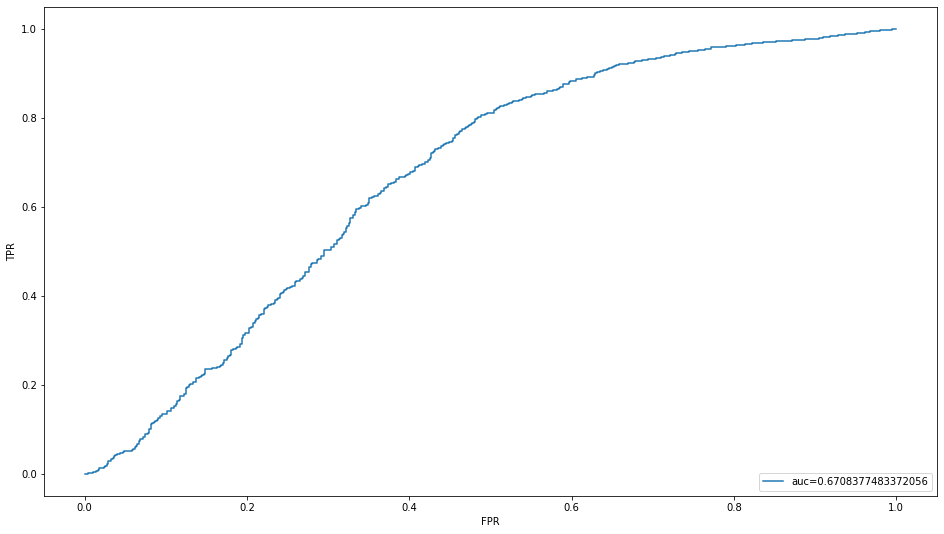

In [43]:
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc=4)
plt.show()